# 12 Months of Electronics Sales Data Analysis using Python

## Getting Things Ready

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Concatenating 12 CSV Files Into One

In [2]:
import os
import glob

# First we want to list all files we have
path = 'D:\Project Save File\Python\BigData-n-Analytics\electronics-store-sales-analysis\Sales_Data'
extension = 'csv'
os.chdir(path)
all_filenames = [i for i in glob.glob('*.{}'.format(extension))]
print(all_filenames)

# # Combine all csv files in the folder into one
# combined_csv = pd.concat([pd.read_csv(f) for f in all_filenames])
# combined_csv.to_csv("All_Sales_2019.csv", index = False, encoding = 'utf-8-sig')

['All_Sales_2019.csv', 'Sales_April_2019.csv', 'Sales_August_2019.csv', 'Sales_December_2019.csv', 'Sales_February_2019.csv', 'Sales_January_2019.csv', 'Sales_July_2019.csv', 'Sales_June_2019.csv', 'Sales_March_2019.csv', 'Sales_May_2019.csv', 'Sales_November_2019.csv', 'Sales_October_2019.csv', 'Sales_September_2019.csv']


## Data Preparation and Cleaning

### Read and copy to another variable, so we don't change the original csv

In [3]:
sales_raw_df = pd.read_csv("All_Sales_2019.csv")
sales_df = sales_raw_df.copy()

print(sales_df.info())
print(sales_df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373700 entries, 0 to 373699
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          372610 non-null  object
 1   Product           372610 non-null  object
 2   Quantity Ordered  372610 non-null  object
 3   Price Each        372610 non-null  object
 4   Order Date        372610 non-null  object
 5   Purchase Address  372610 non-null  object
dtypes: object(6)
memory usage: 17.1+ MB
None
        Order ID               Product Quantity Ordered Price Each  \
count     372610                372610           372610     372610   
unique    178438                    20               10         24   
top     Order ID  USB-C Charging Cable                1      11.95   
freq         710                 43806           337104      43806   

        Order Date  Purchase Address  
count       372610            372610  
unique      142396            140788  


### Drop the missing values

In [4]:
sales_df.dropna(inplace=True)

print(sales_df.isna()[100:200])

     Order ID  Product  Quantity Ordered  Price Each  Order Date  \
101     False    False             False       False       False   
102     False    False             False       False       False   
103     False    False             False       False       False   
104     False    False             False       False       False   
105     False    False             False       False       False   
..        ...      ...               ...         ...         ...   
196     False    False             False       False       False   
197     False    False             False       False       False   
198     False    False             False       False       False   
199     False    False             False       False       False   
200     False    False             False       False       False   

     Purchase Address  
101             False  
102             False  
103             False  
104             False  
105             False  
..                ...  
196            

### Convert some other columns into numeric data types

In [5]:
sales_df["Order ID"] = pd.to_numeric(sales_df["Order ID"], errors='coerce')
sales_df["Quantity Ordered"] = pd.to_numeric(sales_df["Quantity Ordered"], errors='coerce')
sales_df["Price Each"] = pd.to_numeric(sales_df["Price Each"], errors='coerce')

print(sales_df.info())
print(sales_df.describe())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 372610 entries, 0 to 373699
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order ID          371900 non-null  float64
 1   Product           372610 non-null  object 
 2   Quantity Ordered  371900 non-null  float64
 3   Price Each        371900 non-null  float64
 4   Order Date        372610 non-null  object 
 5   Purchase Address  372610 non-null  object 
dtypes: float64(3), object(3)
memory usage: 19.9+ MB
None
            Order ID  Quantity Ordered     Price Each
count  371900.000000     371900.000000  371900.000000
mean   230417.569379          1.124383     184.399735
std     51512.667854          0.442792     332.730883
min    141234.000000          1.000000       2.990000
25%    185831.000000          1.000000      11.950000
50%    230367.500000          1.000000      14.950000
75%    275036.000000          1.000000     150.000000
max    319670.00

Because there are another nan addition after the conversion, we drop all rows whis has the nan again

In [6]:
sales_df.dropna(inplace=True)

# print(sales_df.info())
# print(sales_df.describe())

print(sales_df[(sales_df["Product"] == "iPhone") & (sales_df["Quantity Ordered"] > 1)])

        Order ID Product  Quantity Ordered  Price Each      Order Date  \
11977   187982.0  iPhone               2.0       700.0  04/06/19 22:03   
16470   192271.0  iPhone               2.0       700.0  04/18/19 17:14   
79567   225118.0  iPhone               2.0       700.0  07/21/19 11:45   
113939  170287.0  iPhone               2.0       700.0  03/30/19 14:33   
139522  281095.0  iPhone               2.0       700.0  11/18/19 23:44   
164887  268994.0  iPhone               2.0       700.0  10/13/19 08:31   
181763  254477.0  iPhone               2.0       700.0  09/12/19 12:15   
198827  187982.0  iPhone               2.0       700.0  04/06/19 22:03   
203320  192271.0  iPhone               2.0       700.0  04/18/19 17:14   
266417  225118.0  iPhone               2.0       700.0  07/21/19 11:45   
300789  170287.0  iPhone               2.0       700.0  03/30/19 14:33   
326372  281095.0  iPhone               2.0       700.0  11/18/19 23:44   
351737  268994.0  iPhone              

### Create "Month", "Date", "Year", and "Time" columns
Or we can simply use the .to_datetime to make/convert valid datetime column, so we can also extract the necessary date later

In [7]:
sales_df["datetime"] = pd.to_datetime(sales_df["Order Date"])

print(sales_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 371900 entries, 0 to 373699
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          371900 non-null  float64       
 1   Product           371900 non-null  object        
 2   Quantity Ordered  371900 non-null  float64       
 3   Price Each        371900 non-null  float64       
 4   Order Date        371900 non-null  object        
 5   Purchase Address  371900 non-null  object        
 6   datetime          371900 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(3), object(3)
memory usage: 22.7+ MB
None


### Create "City", and "State" columns

In [8]:
US_state = {"TX" : "Texas", "MA" : "Massachusetts", "CA" : "California", "WA" : "Washington", "GA" : "Georgia", "NY" : "New York", "OR" : "Oregon", "ME" : "Maine"}

sales_df["City"] = sales_df["Purchase Address"].str.split(",").str.get(1)
sales_df["State"] = sales_df["Purchase Address"].str.split(",").str.get(2)
sales_df["State"] = sales_df["State"].str.split(" ").str.get(1).replace(US_state)

print(sales_df["City"].unique())
print(sales_df["State"])

[' Dallas' ' Boston' ' Los Angeles' ' San Francisco' ' Seattle' ' Atlanta'
 ' New York City' ' Portland' ' Austin']
0                 Texas
2         Massachusetts
3            California
4            California
5            California
              ...      
373695       California
373696       California
373697       California
373698       California
373699       California
Name: State, Length: 371900, dtype: object


## Exploratory Data Analysis

### Product vs Price Each

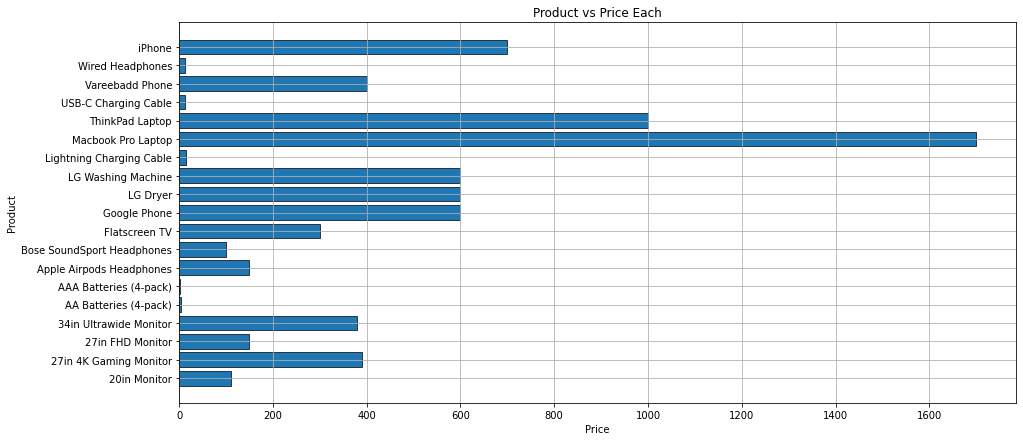

Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64


In [9]:
# Lets plot the data
product = sales_df.sort_values("Product", ascending = True)["Product"].unique()
productPrice = sales_df.groupby("Product")[["Price Each", "Quantity Ordered"]].min().sort_values("Product", ascending=True)

fig, ax = plt.subplots(figsize=(15,7))
plt.title("Product vs Price Each")
plt.xlabel("Price")
plt.ylabel("Product")
plt.grid(True)

ax.barh(product, productPrice["Price Each"], edgecolor="black", linewidth=0.7)
# ax.set(xticks=np.arrange(1, 8), yticks=np.arrange(1, 8))

plt.show()

print(productPrice["Price Each"])

### Product vs Quantity Ordered

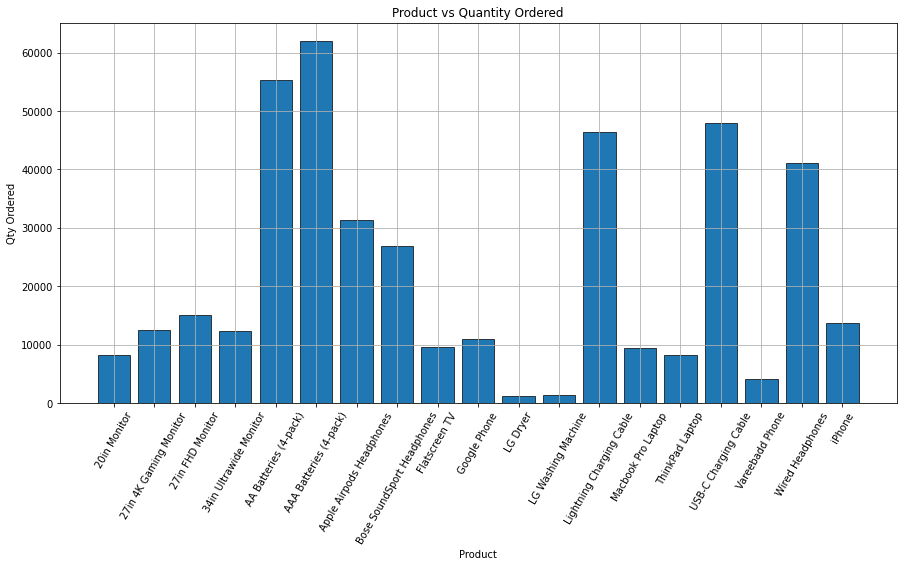

Product
20in Monitor                   8258.0
27in 4K Gaming Monitor        12488.0
27in FHD Monitor              15100.0
34in Ultrawide Monitor        12398.0
AA Batteries (4-pack)         55270.0
AAA Batteries (4-pack)        62034.0
Apple Airpods Headphones      31322.0
Bose SoundSport Headphones    26914.0
Flatscreen TV                  9638.0
Google Phone                  11064.0
LG Dryer                       1292.0
LG Washing Machine             1332.0
Lightning Charging Cable      46434.0
Macbook Pro Laptop             9456.0
ThinkPad Laptop                8260.0
USB-C Charging Cable          47950.0
Vareebadd Phone                4136.0
Wired Headphones              41114.0
iPhone                        13698.0
Name: Quantity Ordered, dtype: float64


In [10]:
# Lets plot the data
productQty = sales_df.groupby("Product")[["Price Each", "Quantity Ordered"]].sum().sort_values("Product", ascending=True)

fig, ax = plt.subplots(figsize=(15,7))
plt.title("Product vs Quantity Ordered")
plt.xlabel("Product")
plt.ylabel("Qty Ordered")
plt.xticks(rotation=60)
plt.grid(True)

ax.bar(product, productQty["Quantity Ordered"], edgecolor="black", linewidth=0.7)
# ax.set(xticks=np.arrange(1, 8), yticks=np.arrange(1, 8))

plt.show()

print(productQty["Quantity Ordered"])

### Buyer's City

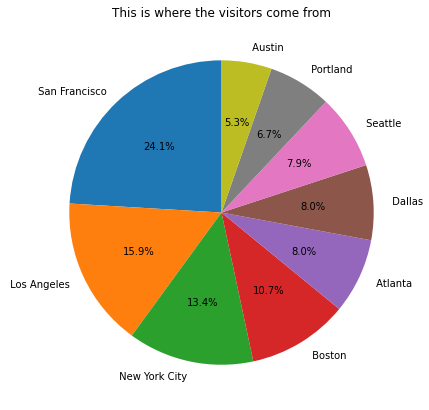

 San Francisco    89464
 Los Angeles      59210
 New York City    49752
 Boston           39868
 Atlanta          29762
 Dallas           29640
 Seattle          29464
 Portland         24930
 Austin           19810
Name: City, dtype: int64


In [11]:
# Lets plot the data
cityCount = sales_df["City"].value_counts()

fig, ax = plt.subplots(figsize=(15,7))
plt.title("This is where the visitors come from")
ax.pie(cityCount,labels=cityCount.index, autopct='%1.1f%%', startangle=90)

plt.show()

print(cityCount)

### Product's quantity ordered in every months and states

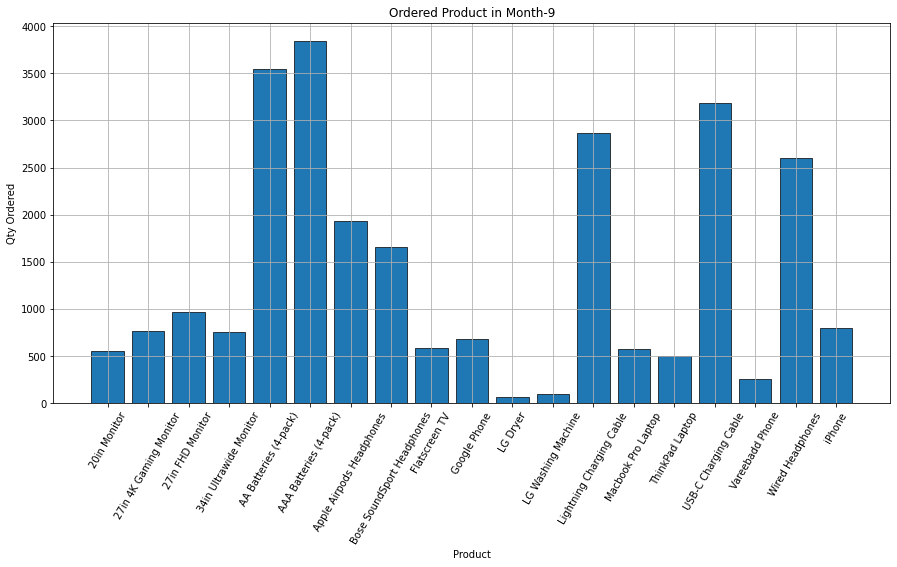

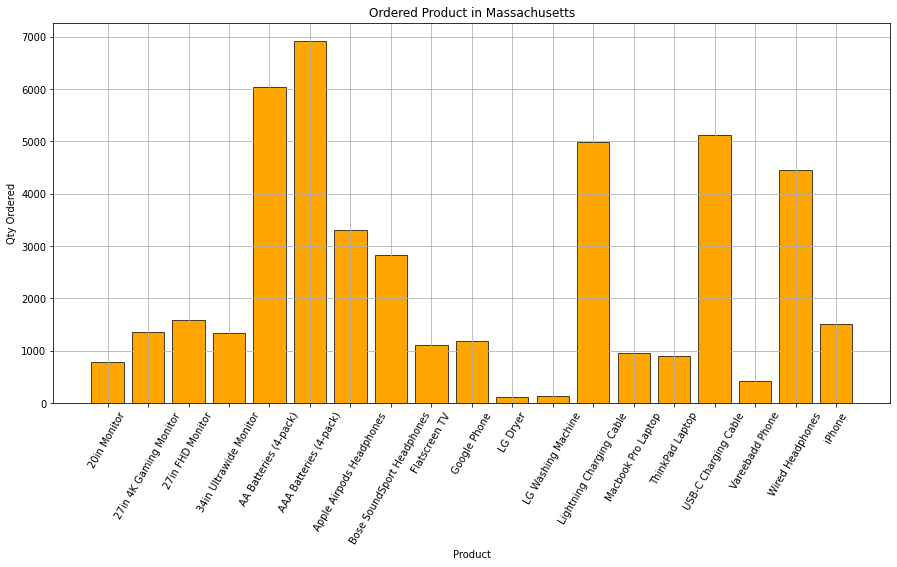

                            Quantity Ordered  Price Each
Product                                                 
20in Monitor                           788.0    86672.12
27in 4K Gaming Monitor                1350.0   524926.54
27in FHD Monitor                      1594.0   237884.14
34in Ultrawide Monitor                1342.0   508426.62
AA Batteries (4-pack)                 6032.0    17011.20
AAA Batteries (4-pack)                6922.0    13759.98
Apple Airpods Headphones              3306.0   492600.00
Bose SoundSport Headphones            2832.0   280371.96
Flatscreen TV                         1108.0   330600.00
Google Phone                          1186.0   710400.00
LG Dryer                               118.0    70800.00
LG Washing Machine                     144.0    86400.00
Lightning Charging Cable              4982.0    69457.70
Macbook Pro Laptop                     958.0  1625200.00
ThinkPad Laptop                        894.0   891991.08
USB-C Charging Cable           

In [96]:
# In Months
productMonth = sales_df[sales_df["datetime"].dt.month == 9].groupby("Product")[["Quantity Ordered", "Price Each"]].sum()

# In Every States
productStates = sales_df[sales_df["State"] == "Massachusetts"].groupby("Product")[["Quantity Ordered", "Price Each"]].sum()

fig1, ax = plt.subplots(figsize=(15,7))
plt.title("Ordered Product in Month-9")
plt.xlabel("Product")
plt.ylabel("Qty Ordered")
plt.xticks(rotation=60)
plt.grid(True)
ax.bar(productMonth.index, productMonth["Quantity Ordered"], edgecolor="black", linewidth=0.7)
# ax.set(xticks=np.arrange(1, 8), yticks=np.arrange(1, 8))

fig2, ax = plt.subplots(figsize=(15,7))
plt.title("Ordered Product in Massachusetts")
plt.xlabel("Product")
plt.ylabel("Qty Ordered")
plt.xticks(rotation=60)
plt.grid(True)
ax.bar(productStates.index, productStates["Quantity Ordered"], edgecolor="black", linewidth=0.7, color="Orange")
# ax.set(xticks=np.arrange(1, 8), yticks=np.arrange(1, 8))

plt.show()

print(productStates)

### Single product ordered in all months and states

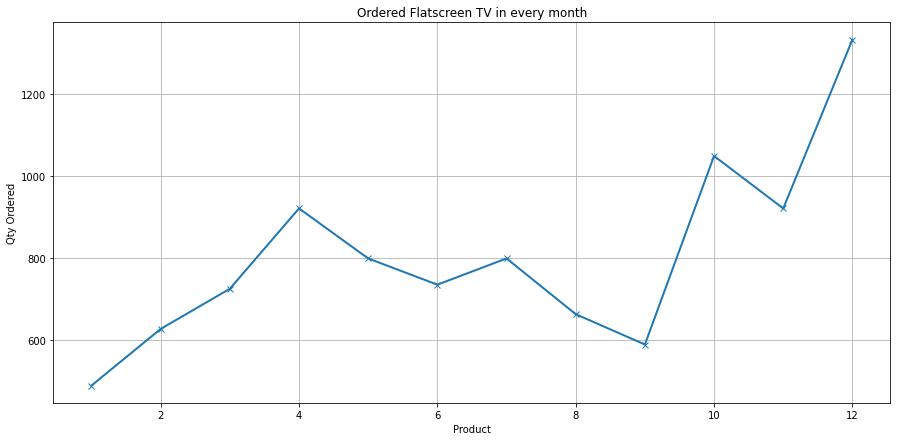

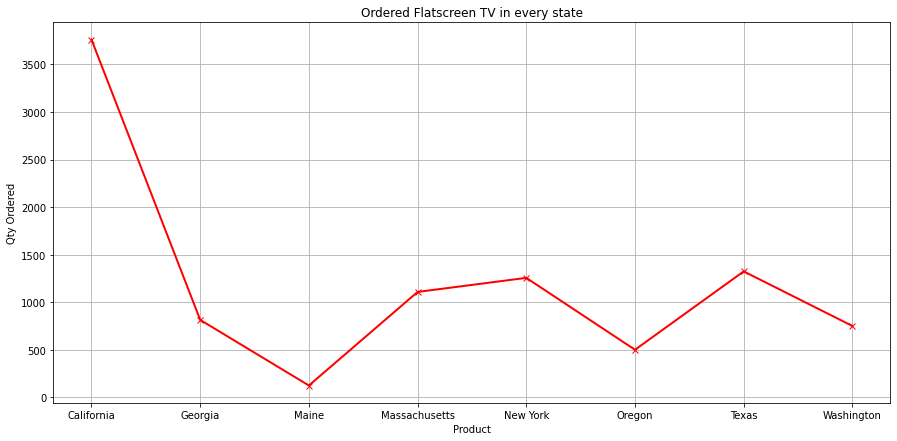

datetime
1      488.0
2      626.0
3      724.0
4      920.0
5      798.0
6      734.0
7      798.0
8      662.0
9      588.0
10    1048.0
11     920.0
12    1332.0
Name: Quantity Ordered, dtype: float64
State
California       3762.0
Georgia           814.0
Maine             124.0
Massachusetts    1108.0
New York         1256.0
Oregon            500.0
Texas            1324.0
Washington        750.0
Name: Quantity Ordered, dtype: float64


In [102]:
# In every Months
monthlyProduct = sales_df[sales_df["Product"] == "Flatscreen TV"].groupby(sales_df["datetime"].dt.month)[["Quantity Ordered", "Price Each"]].sum()

# In every States
inStateProduct = sales_df[sales_df["Product"] == "Flatscreen TV"].groupby("State")[["Quantity Ordered", "Price Each"]].sum()

fig1, ax = plt.subplots(figsize=(15,7))
plt.title("Ordered Flatscreen TV in every month")
plt.xlabel("Product")
plt.ylabel("Qty Ordered")
plt.xticks(rotation=0)
plt.grid(True)
ax.plot(monthlyProduct.index, monthlyProduct["Quantity Ordered"], 'x-', linewidth=2.0)

fig2, ax = plt.subplots(figsize=(15,7))
plt.title("Ordered Flatscreen TV in every state")
plt.xlabel("Product")
plt.ylabel("Qty Ordered")
plt.xticks(rotation=0)
plt.grid(True)
ax.plot(inStateProduct.index, inStateProduct["Quantity Ordered"], 'x-r', linewidth=2.0)

plt.show()

print(monthlyProduct["Quantity Ordered"])
print(inStateProduct["Quantity Ordered"])